## JC274-20220314 .whl metadata
Animal: **JC274** <br>
Chocolate_arm: **8** <br>
Honey_arm: **4** <br>
Sunflower_arm: 5 (not relevant for this session) <br>
---
Training_day: **8** <br>
Accuracy: **64.29%** <br>
Threshold_reached_day: **10** <br>

In [1]:
# %matplotlib

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import datetime
mpl.rcParams['font.size'] = 15

# basename = 'JC283-20220920'
basename = 'maze_test'

pos = pd.read_csv(basename+'.whl', sep=" ",
                 header=None,
                 names=["x1","y1","x2","y2","timestamps","valid"])

In [2]:
pos.head()

,x1,y1,x2,y2,timestamps,valid
0,60,73,59,70,1,1
1,60,73,58,70,481,1
2,60,73,59,70,961,1
3,60,73,58,69,1441,1
4,60,73,59,70,1921,1


In [3]:
pos[pos == 1023] = np.nan # replace 1023 (error value) with NaN
print(pos.describe())

                x1           y1           x2           y2    timestamps  \
count  7433.000000  7433.000000  4444.000000  4444.000000  8.192000e+03   
mean     72.348177    86.018297    74.607111    87.136364  1.965841e+06   
std      38.298532    41.076810    38.270446    38.708888  1.135186e+06   
min       1.000000     8.000000     0.000000     5.000000  1.000000e+00   
25%      49.000000    62.000000    52.000000    68.000000  9.829210e+05   
50%      62.000000    79.000000    63.000000    76.000000  1.965841e+06   
75%     102.000000   120.000000   102.000000   117.000000  2.948761e+06   
max     142.000000   154.000000   150.000000   157.000000  3.931681e+06   

             valid  
count  8192.000000  
mean      0.907349  
std       0.289961  
min       0.000000  
25%       1.000000  
50%       1.000000  
75%       1.000000  
max       1.000000  


In [4]:
x1 = pos["x1"]
y1 = pos["y1"]
timestamps = pos["timestamps"]
valid = pos["valid"]

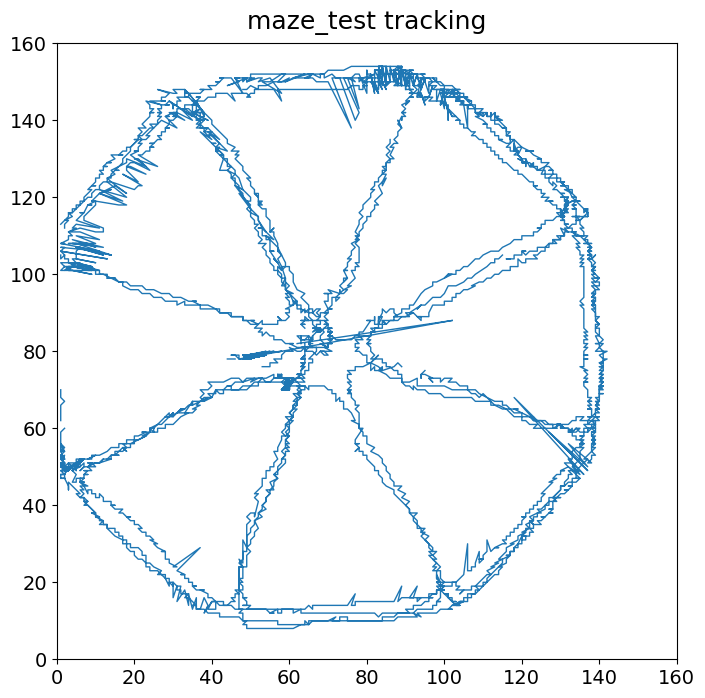

In [5]:
fig, ax = plt.subplots(figsize=(8,8))
timenow = datetime.datetime.today().strftime("%Y%m%d-%H%M%S")
ax.plot(x1, y1, linewidth=1)
ax.set_title(basename+" tracking", fontsize=18, y=1.01)
ax.tick_params(labelsize=14)
plt.xlim(0,160)
plt.ylim(0,160)
plt.show()
# plt.savefig(basename+"_tracking_"+timenow+".png")

In [18]:
timestamps.describe()

count    7.915600e+05
mean     1.899718e+08
std      1.096804e+08
min      1.000000e+00
25%      9.498618e+07
50%      1.899716e+08
75%      2.849576e+08
max      3.799441e+08
Name: timestamps, dtype: float64

In [19]:
print(timestamps.min(), timestamps.max())
print(timestamps.count())

1 379944078
791560


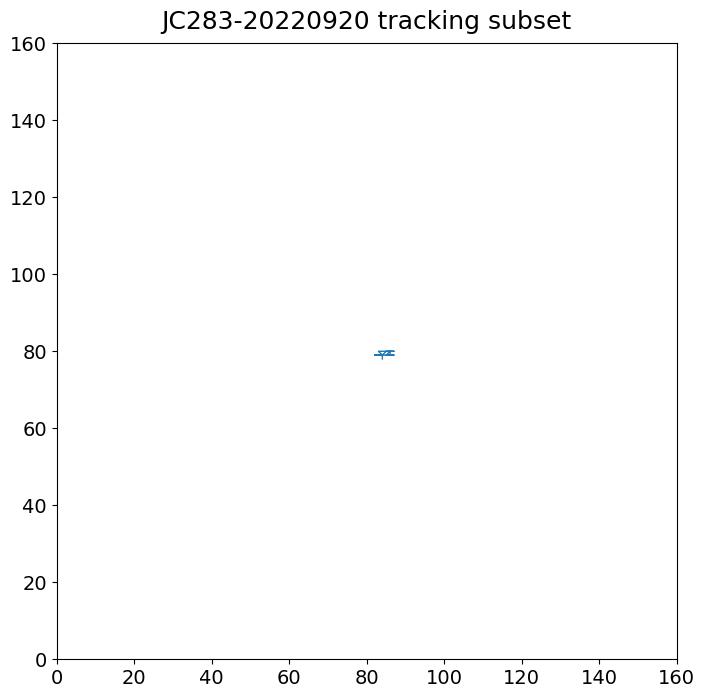

In [20]:
timestart = 0
timeend = 1_030_000
subset = pos.loc[(timestamps > timestart) & (timestamps < timeend)]

fig, ax = plt.subplots(figsize=(8,8))
timenow = datetime.datetime.today().strftime("%Y%m%d-%H%M%S")
ax.plot(subset["x1"], subset["y1"], linewidth=1)
ax.set_title(basename+" tracking subset", fontsize=18, y=1.01)
ax.tick_params(labelsize=14)
plt.xlim(0,160)
plt.ylim(0,160)
plt.show()
# plt.savefig(basename+"_tracking-subset_"+timenow+".png")

### Invalid timestamps

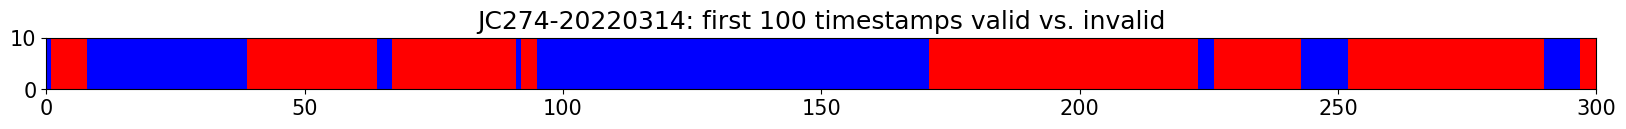

In [9]:
# For now I'm only plotting the first 100 timestamps, because otherwise it doesn't fit
subsetValid = valid[0:300]

fig, ax = plt.subplots(figsize=(20,1.5))
timenow = datetime.datetime.today().strftime("%Y%m%d-%H%M%S")
# the np function atleast_2d converts scalar and 1d arrays to 2d arrays
# bwr_r is the bwr (blue to red) cmap reversed, so that 0=red and 1=blue
ax.imshow(np.atleast_2d(subsetValid), cmap='bwr_r', extent=(0, len(subsetValid), 0, 10))
ax.set_title(basename+": first 100 timestamps valid vs. invalid", fontsize=18, y=1.01)

# plt.show()
timenow = datetime.datetime.today().strftime("%Y%m%d-%H%M%S")
# plt.savefig(basename+"_valid-timestamps-subset_"+timenow+".png")

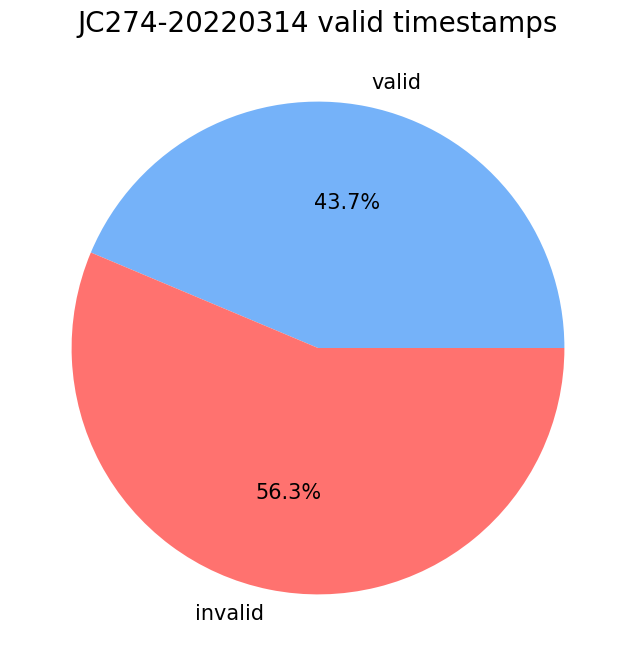

In [10]:
# I'll make a humble pie chart because I can't think of how to conserve the time data. Possibly with a matrix.
fig, ax = plt.subplots(figsize=(8,8))
labels = ['valid', 'invalid']
ax.pie([subsetValid.mean(), 1-subsetValid.mean()],
       labels=labels,
       autopct='%1.1f%%', #formatting
       colors=['#75b2f9', '#ff726f'],
      )
ax.set_title(basename+" valid timestamps", fontsize=20)
plt.show()
timenow = datetime.datetime.today().strftime("%Y%m%d-%H%M%S")
# plt.savefig(basename+"_valid-timestamps-pie-chart_"+timenow+".png")